In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
mpl.rcParams['figure.dpi'] = 100

In [1]:
from analysisFunctions import importOrbitData


data = importOrbitData("sat_srp_with_sun_moving_1673178970880.txt")

100%|██████████| 2628/2628 [00:00<00:00, 168394.99it/s]


In [3]:
oneDayInSeconds = 86400
oneYearInSeconds = oneDayInSeconds * 365
dayI = []
prevDayIValue = 1000000000
yearI = []
prevYearIValue = 1000000000
for i in range(len(data["t"])):
    
    if data["t"][i] % oneDayInSeconds < prevDayIValue:
        dayI.append(i)

    prevDayIValue = data["t"][i] % oneDayInSeconds;

    if data["t"][i] % oneYearInSeconds < prevYearIValue:
        yearI.append(i)

    prevYearIValue = data["t"][i] % oneYearInSeconds;

    # if not yearIFound and float(data["t"][i]) > oneYearInSeconds:
    #     yearI.append(i)
    #     print(yearI)
    #     yearIFound = True

print(yearI)


[0, 526, 1052, 1577, 2103]


In [ ]:
plt.xlabel("x position of satellite (m)")
plt.ylabel("y position of satellite (m)")
plt.scatter(data["x"][:dayI[0]],data["y"][:dayI[0]],s=1)
plt.tight_layout()
plt.axis('scaled')

In [5]:
#calculate kepler values
from analysisFunctions import calculateKeplerFromData

keplerData = calculateKeplerFromData(data)



/Users/fraser/Github/masters_project/python/orbitFunctions.py:63: RuntimeWarning: invalid value encountered in double_scalars
  Omega = np.arccos(n[0] / nMag) * rad2Deg
/Users/fraser/Github/masters_project/python/orbitFunctions.py:70: RuntimeWarning: invalid value encountered in double_scalars
  omega = np.arccos(ne / (nMag * e)) * rad2Deg


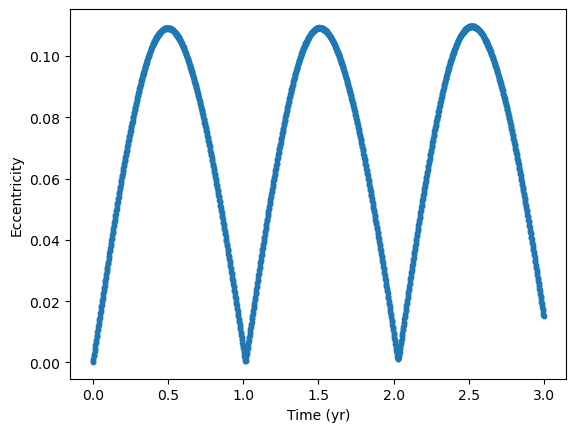

In [6]:
plt.xlabel("Time (yr)")
plt.ylabel("Eccentricity")
n = 1000
year = [ele/oneYearInSeconds for ele in data["t"]]
plt.scatter(year[:yearI[3]],keplerData["e"][:yearI[3]],s=10)

0
1
2
3
0
1
2
3
0
1
